Saving austin_weather.csv to austin_weather (1).csv
First five rows of the dataset:
         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71       

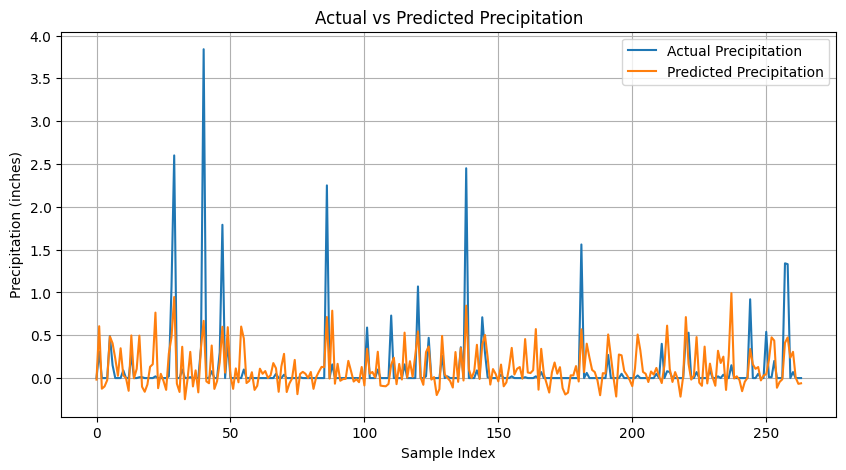

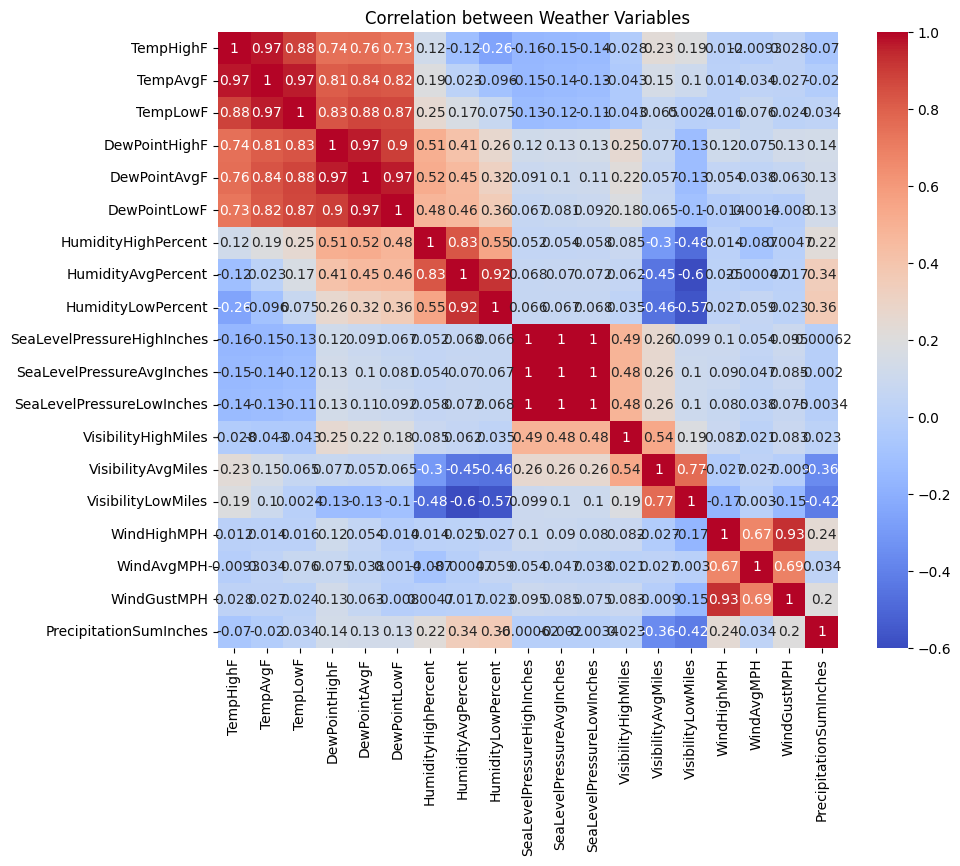

In [2]:
# Assignment 9 - Rainfall Prediction Project
# Module 13: Machine Learning - Linear Regression

# Step 1: Upload the Dataset .

from google.colab import files
uploaded = files.upload()

# Step 2: Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 3: Load the Dataset

# Make sure the CSV file is in the same directory or uploaded properly
data = pd.read_csv("austin_weather.csv")
print("First five rows of the dataset:")
print(data.head())

# Step 4: Explore the Dataset

print("Basic information about the dataset:")
print(data.info())

print("Summary statistics:")
print(data.describe())

# Step 5: Clean the Data

# Remove irrelevant columns such as 'Events' and 'Date'
data.drop(columns=["Events", "Date"], inplace=True)

# Replace values like 'T' (trace amount) and '-' with 0.0
data.replace(['T', '-'], 0.0, inplace=True)

# Convert all values to numeric, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

print("Shape of dataset after cleaning:", data.shape)

# Step 6: Prepare Features and Target

# Independent variables (features)
X = data.drop(columns=["PrecipitationSumInches"])

# Dependent variable (target)
y = data["PrecipitationSumInches"]

# Step 7: Split the Data

# Use 80% of data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Step 8: Train the Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Make Predictions

y_pred = model.predict(X_test)

# Step 10: Evaluate the Model

print("R-squared score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Step 11: Visualize Actual vs Predicted Precipitation

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Precipitation")
plt.plot(y_pred, label="Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.xlabel("Sample Index")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.grid(True)
plt.show()

# Step 12: Correlation Heatmap (Optional Visualization)

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Weather Variables")
plt.show()
